In [124]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import numpy as np
import statistics

In [125]:
wb1 = xw.Book(r'D:\Published\exposomeProjUvA\plot\tuneLR_DEms1pestExclu.xlsx')
wb2 = xw.Book(r'D:\Published\exposomeProjUvA\plot\tuneDT_DEms1pestExclu.xlsx')
wb3 = xw.Book(r'D:\Published\exposomeProjUvA\plot\tuneRF_DEms1pestExclu2.xlsx')

In [126]:
sheet1 = wb1.sheets("hyperparameterTuning_TPTNwithAb").used_range.value
df_tuneLR = pd.DataFrame(sheet1)
sheet2 = wb2.sheets("hyperparameterTuning_TPTNwithAb").used_range.value
df_tuneDT = pd.DataFrame(sheet2)
sheet3 = wb3.sheets("hyperparameterTuning_TPTNwithAb").used_range.value
df_tuneRF = pd.DataFrame(sheet3)

In [127]:
df_tuneLR = df_tuneLR[df_tuneLR.columns[:21]]
df_tuneDT = df_tuneDT[df_tuneDT.columns[:21]]
df_tuneRF = df_tuneRF[df_tuneRF.columns[:22]]

In [128]:
df_tuneLR = df_tuneLR.rename(columns=df_tuneLR.iloc[0]).drop(df_tuneLR.head(1).index)
df_tuneDT = df_tuneDT.rename(columns=df_tuneDT.iloc[0]).drop(df_tuneDT.head(1).index)
df_tuneRF = df_tuneRF.rename(columns=df_tuneRF.iloc[0]).drop(df_tuneRF.head(1).index)

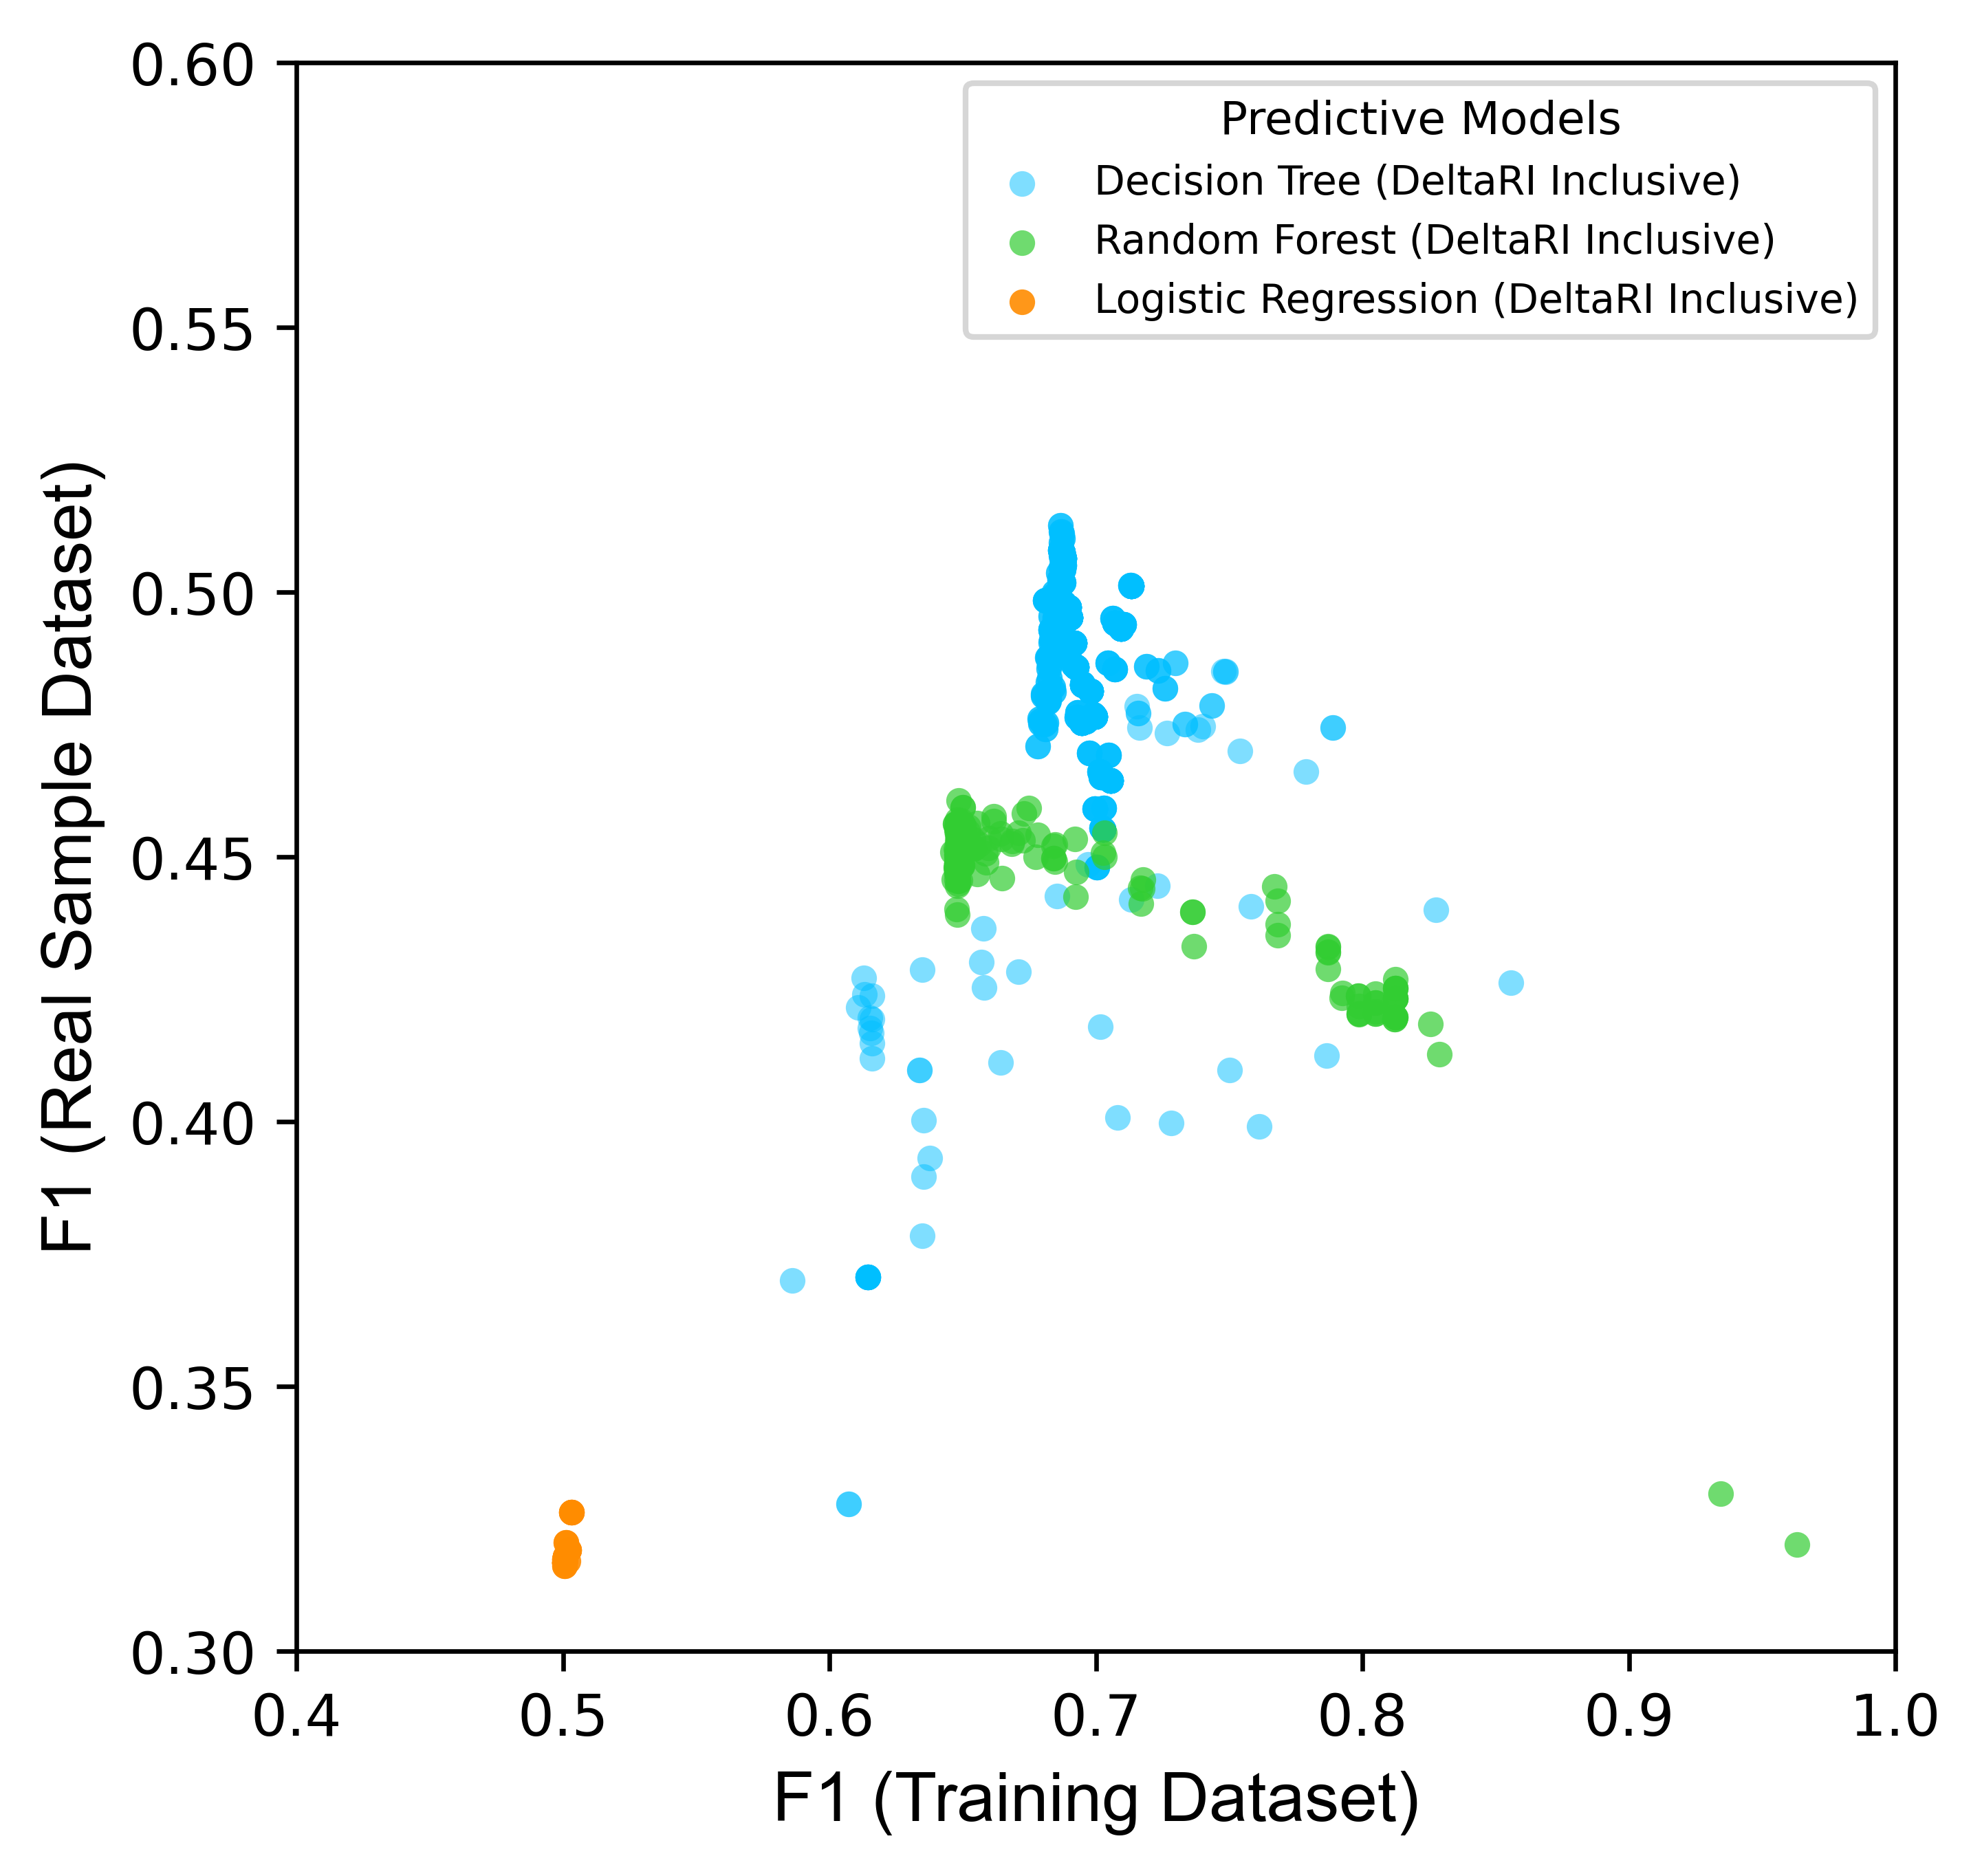

In [129]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

x1 = df_tuneLR['f1_train']
y1 = df_tuneLR['f1_pest2']
z1 = list(df_tuneLR['f1_pest'])
x2 = df_tuneDT['f1_train']
y2 = df_tuneDT['f1_pest2']
z2 = list(df_tuneDT['f1_pest'])
x3 = df_tuneRF['f1_train']
y3 = df_tuneRF['f1_pest2']
z3 = list(df_tuneRF['f1_pest'])

(fig, ax) = plt.subplots()

c_dict2 = {"Decision Tree (DeltaRI Inclusive)": 'deepskyblue', "Decision Tree (DeltaRI Exclusive)": 'navy'}
count_start = 0
count_end = 1121
ax.scatter(x2[count_start:count_end], y2[count_start:count_end], s=20, label="Decision Tree (DeltaRI Inclusive)", c="deepskyblue", alpha=0.5, lw=0)


c_dict3 = {"Random Forest (DeltaRI Inclusive)": 'limegreen', "Random Forest (DeltaRI Exclusive)": 'darkgreen'}
count_start = 0
count_end = 192
ax.scatter(x3[count_start:count_end], y3[count_start:count_end], s=20, label="Random Forest (DeltaRI Inclusive)", c="limegreen", alpha=0.7, lw=0)


c_dict1 = {"Logistic Regression (DeltaRI Inclusive)": 'darkorange', "Logistic Regression (DeltaRI Exclusive)": 'darkred'}
count_start = 0
count_end = 32
ax.scatter(x1[count_start:count_end], y1[count_start:count_end], s=20, label="Logistic Regression (DeltaRI Inclusive)", c="darkorange", alpha=0.9, lw=0)
    
    
plt.xlabel("F1 (Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("F1 (Real Sample Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.4,1.0)
plt.ylim(0.30,0.60)

ax.legend(loc="upper right", title="Predictive Models", title_fontsize=8, fontsize=7)

#plt.show()
plt.savefig(r"D:\Published\exposomeProjUvA\plot\outdated_pest2.jpg", bbox_inches='tight')
#plt.close()

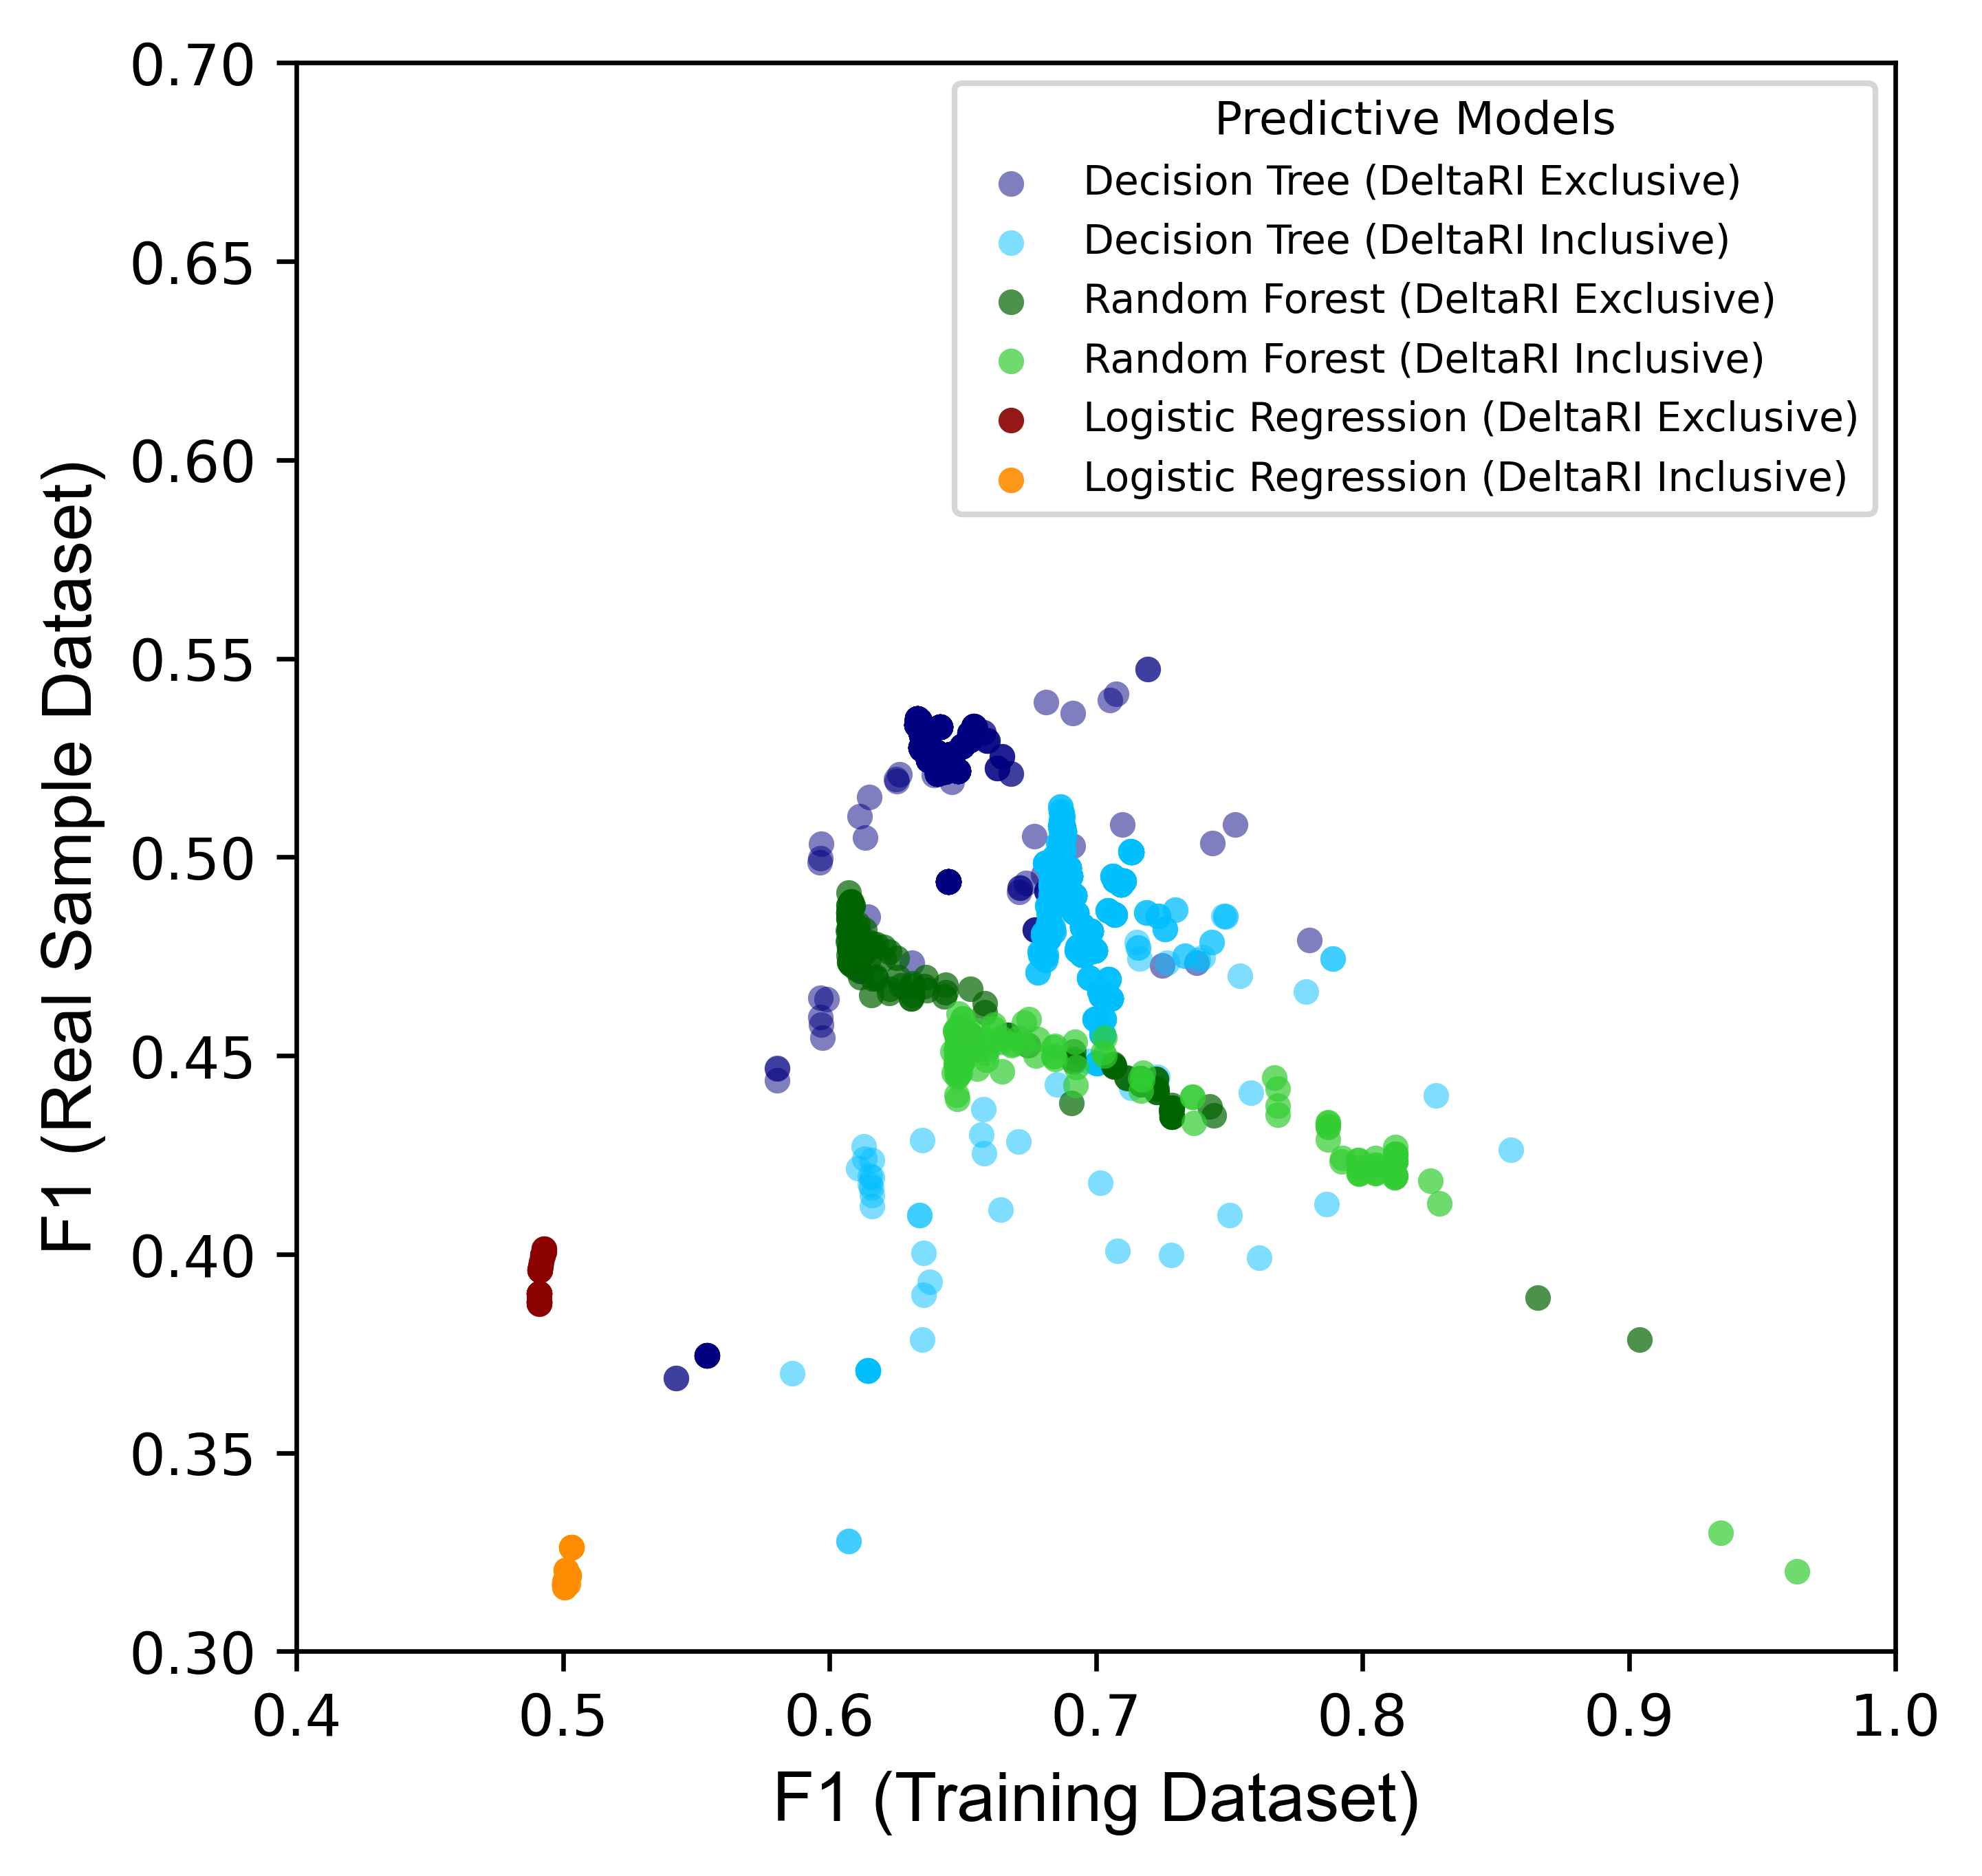

In [130]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

x1 = df_tuneLR['f1_train']
y1 = df_tuneLR['f1_pest2']
z1 = list(df_tuneLR['f1_pest'])
x2 = df_tuneDT['f1_train']
y2 = df_tuneDT['f1_pest2']
z2 = list(df_tuneDT['f1_pest'])
x3 = df_tuneRF['f1_train']
y3 = df_tuneRF['f1_pest2']
z3 = list(df_tuneRF['f1_pest'])

(fig, ax) = plt.subplots()

c_dict2 = {"Decision Tree (DeltaRI Exclusive)": 'navy', "Decision Tree (DeltaRI Inclusive)": 'deepskyblue'}
count_start = 1121
count_end = 2242
for mod in c_dict2:
    ax.scatter(x2[count_start:count_end], y2[count_start:count_end], s=20, label=mod, c=c_dict2[mod], alpha=0.5, lw=0)
    count_start -= 1121
    count_end -= 1121


c_dict3 = {"Random Forest (DeltaRI Exclusive)": 'darkgreen', "Random Forest (DeltaRI Inclusive)": 'limegreen'}
count_start = 192
count_end = 384
for mod in c_dict3:
    ax.scatter(x3[count_start:count_end], y3[count_start:count_end], s=20, label=mod, c=c_dict3[mod], alpha=0.7, lw=0)
    count_start -= 192
    count_end -= 192

c_dict1 = {"Logistic Regression (DeltaRI Exclusive)": 'darkred', "Logistic Regression (DeltaRI Inclusive)": 'darkorange'}
count_start = 32
count_end = 64
for mod in c_dict1:
    ax.scatter(x1[count_start:count_end], y1[count_start:count_end], s=20, label=mod, c=c_dict1[mod], alpha=0.9, lw=0)
    count_start -= 32
    count_end -=32
    
    
plt.xlabel("F1 (Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("F1 (Real Sample Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.4,1.0)
plt.ylim(0.30,0.70)

ax.legend(loc="upper right", title="Predictive Models", title_fontsize=8, fontsize=7)

#plt.show()
plt.savefig(r"D:\Published\exposomeProjUvA\plot\outdated_pest2_.jpg", bbox_inches='tight')
#plt.close()

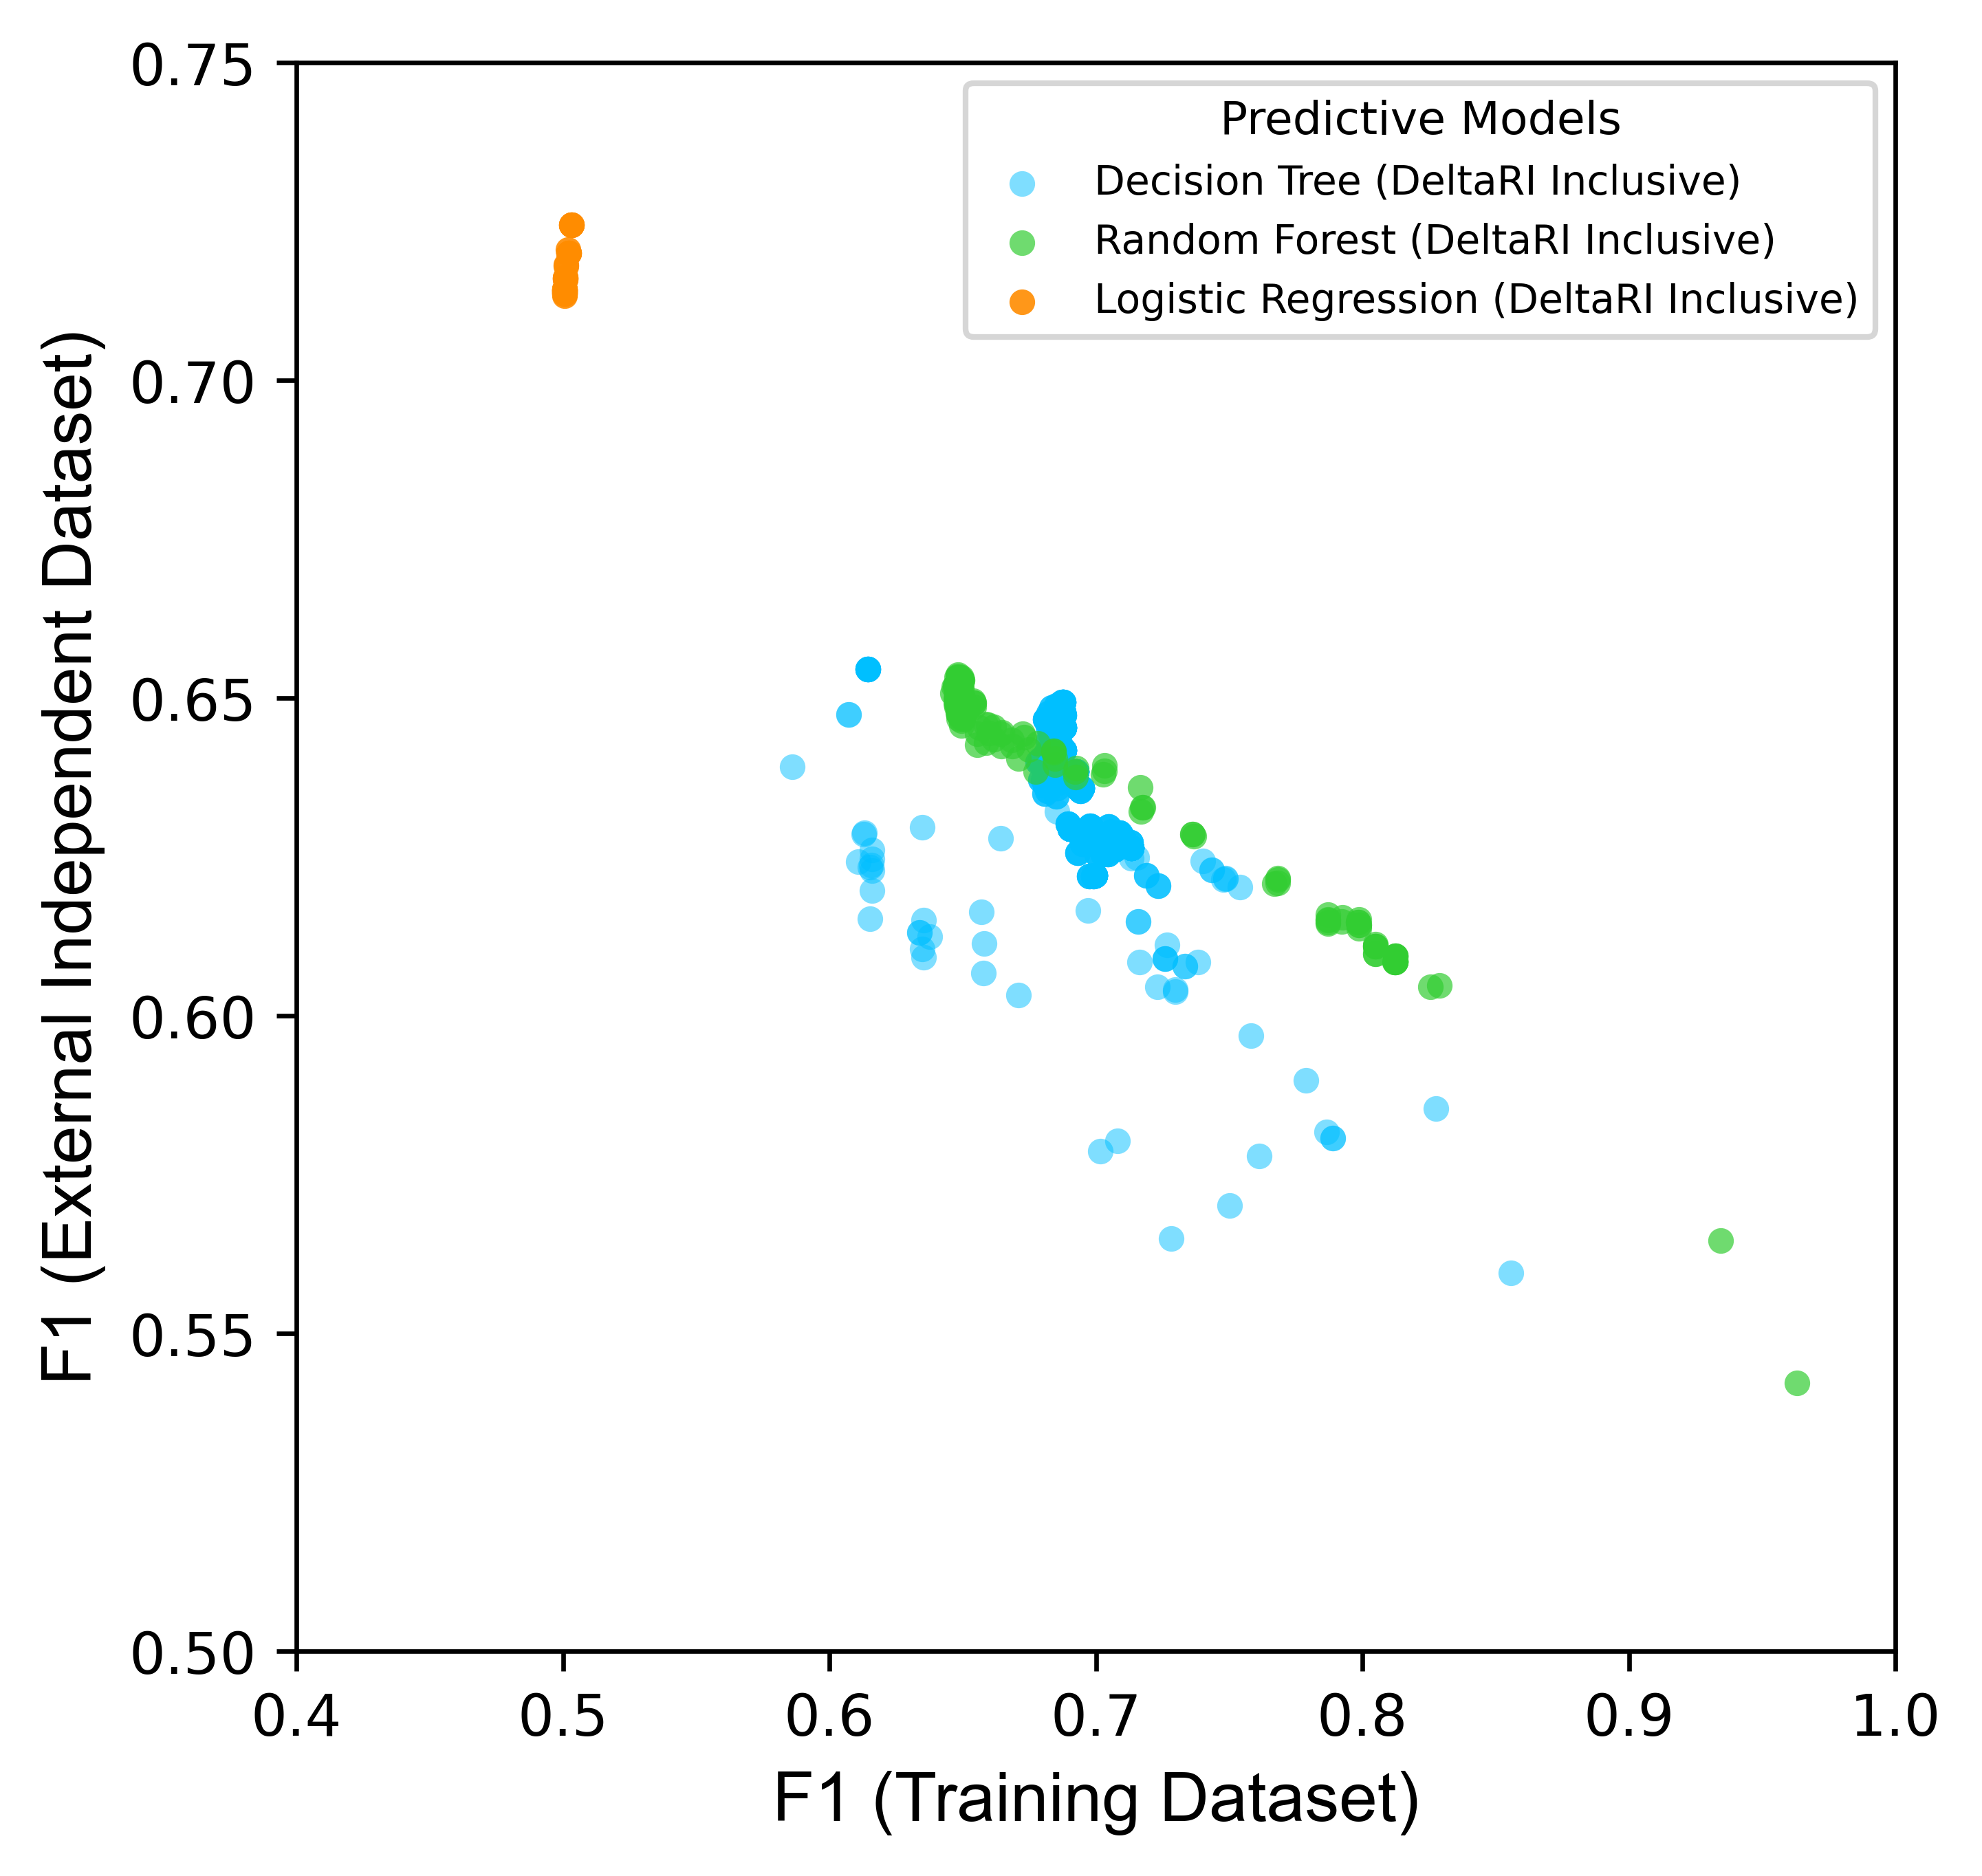

In [131]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

x1 = df_tuneLR['f1_train']
y1 = df_tuneLR['f1_pest2']
z1 = df_tuneLR['f1_pest']
x2 = df_tuneDT['f1_train']
y2 = df_tuneDT['f1_pest2']
z2 = df_tuneDT['f1_pest']
x3 = df_tuneRF['f1_train']
y3 = df_tuneRF['f1_pest2']
z3 = df_tuneRF['f1_pest']

(fig, ax) = plt.subplots()

c_dict2 = {"Decision Tree (DeltaRI Inclusive)": 'deepskyblue', "Decision Tree (DeltaRI Exclusive)": 'navy'}
count_start = 0
count_end = 1121
ax.scatter(x2[count_start:count_end], z2[count_start:count_end], s=20, label="Decision Tree (DeltaRI Inclusive)", c="deepskyblue", alpha=0.5, lw=0)


c_dict3 = {"Random Forest (DeltaRI Inclusive)": 'limegreen', "Random Forest (DeltaRI Exclusive)": 'darkgreen'}
count_start = 0
count_end = 192
ax.scatter(x3[count_start:count_end], z3[count_start:count_end], s=20, label="Random Forest (DeltaRI Inclusive)", c="limegreen", alpha=0.7, lw=0)


c_dict1 = {"Logistic Regression (DeltaRI Inclusive)": 'darkorange', "Logistic Regression (DeltaRI Exclusive)": 'darkred'}
count_start = 0
count_end = 32
ax.scatter(x1[count_start:count_end], z1[count_start:count_end], s=20, label="Logistic Regression (DeltaRI Inclusive)", c="darkorange", alpha=0.9, lw=0)
    
    
plt.xlabel("F1 (Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("F1 (External Independent Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.4,1.0)
plt.ylim(0.5,0.75)

ax.legend(loc="upper right", title="Predictive Models", title_fontsize=8, fontsize=7)

#plt.show()
plt.savefig(r"D:\Published\exposomeProjUvA\plot\outdated_pest.jpg", bbox_inches='tight')
#plt.close()

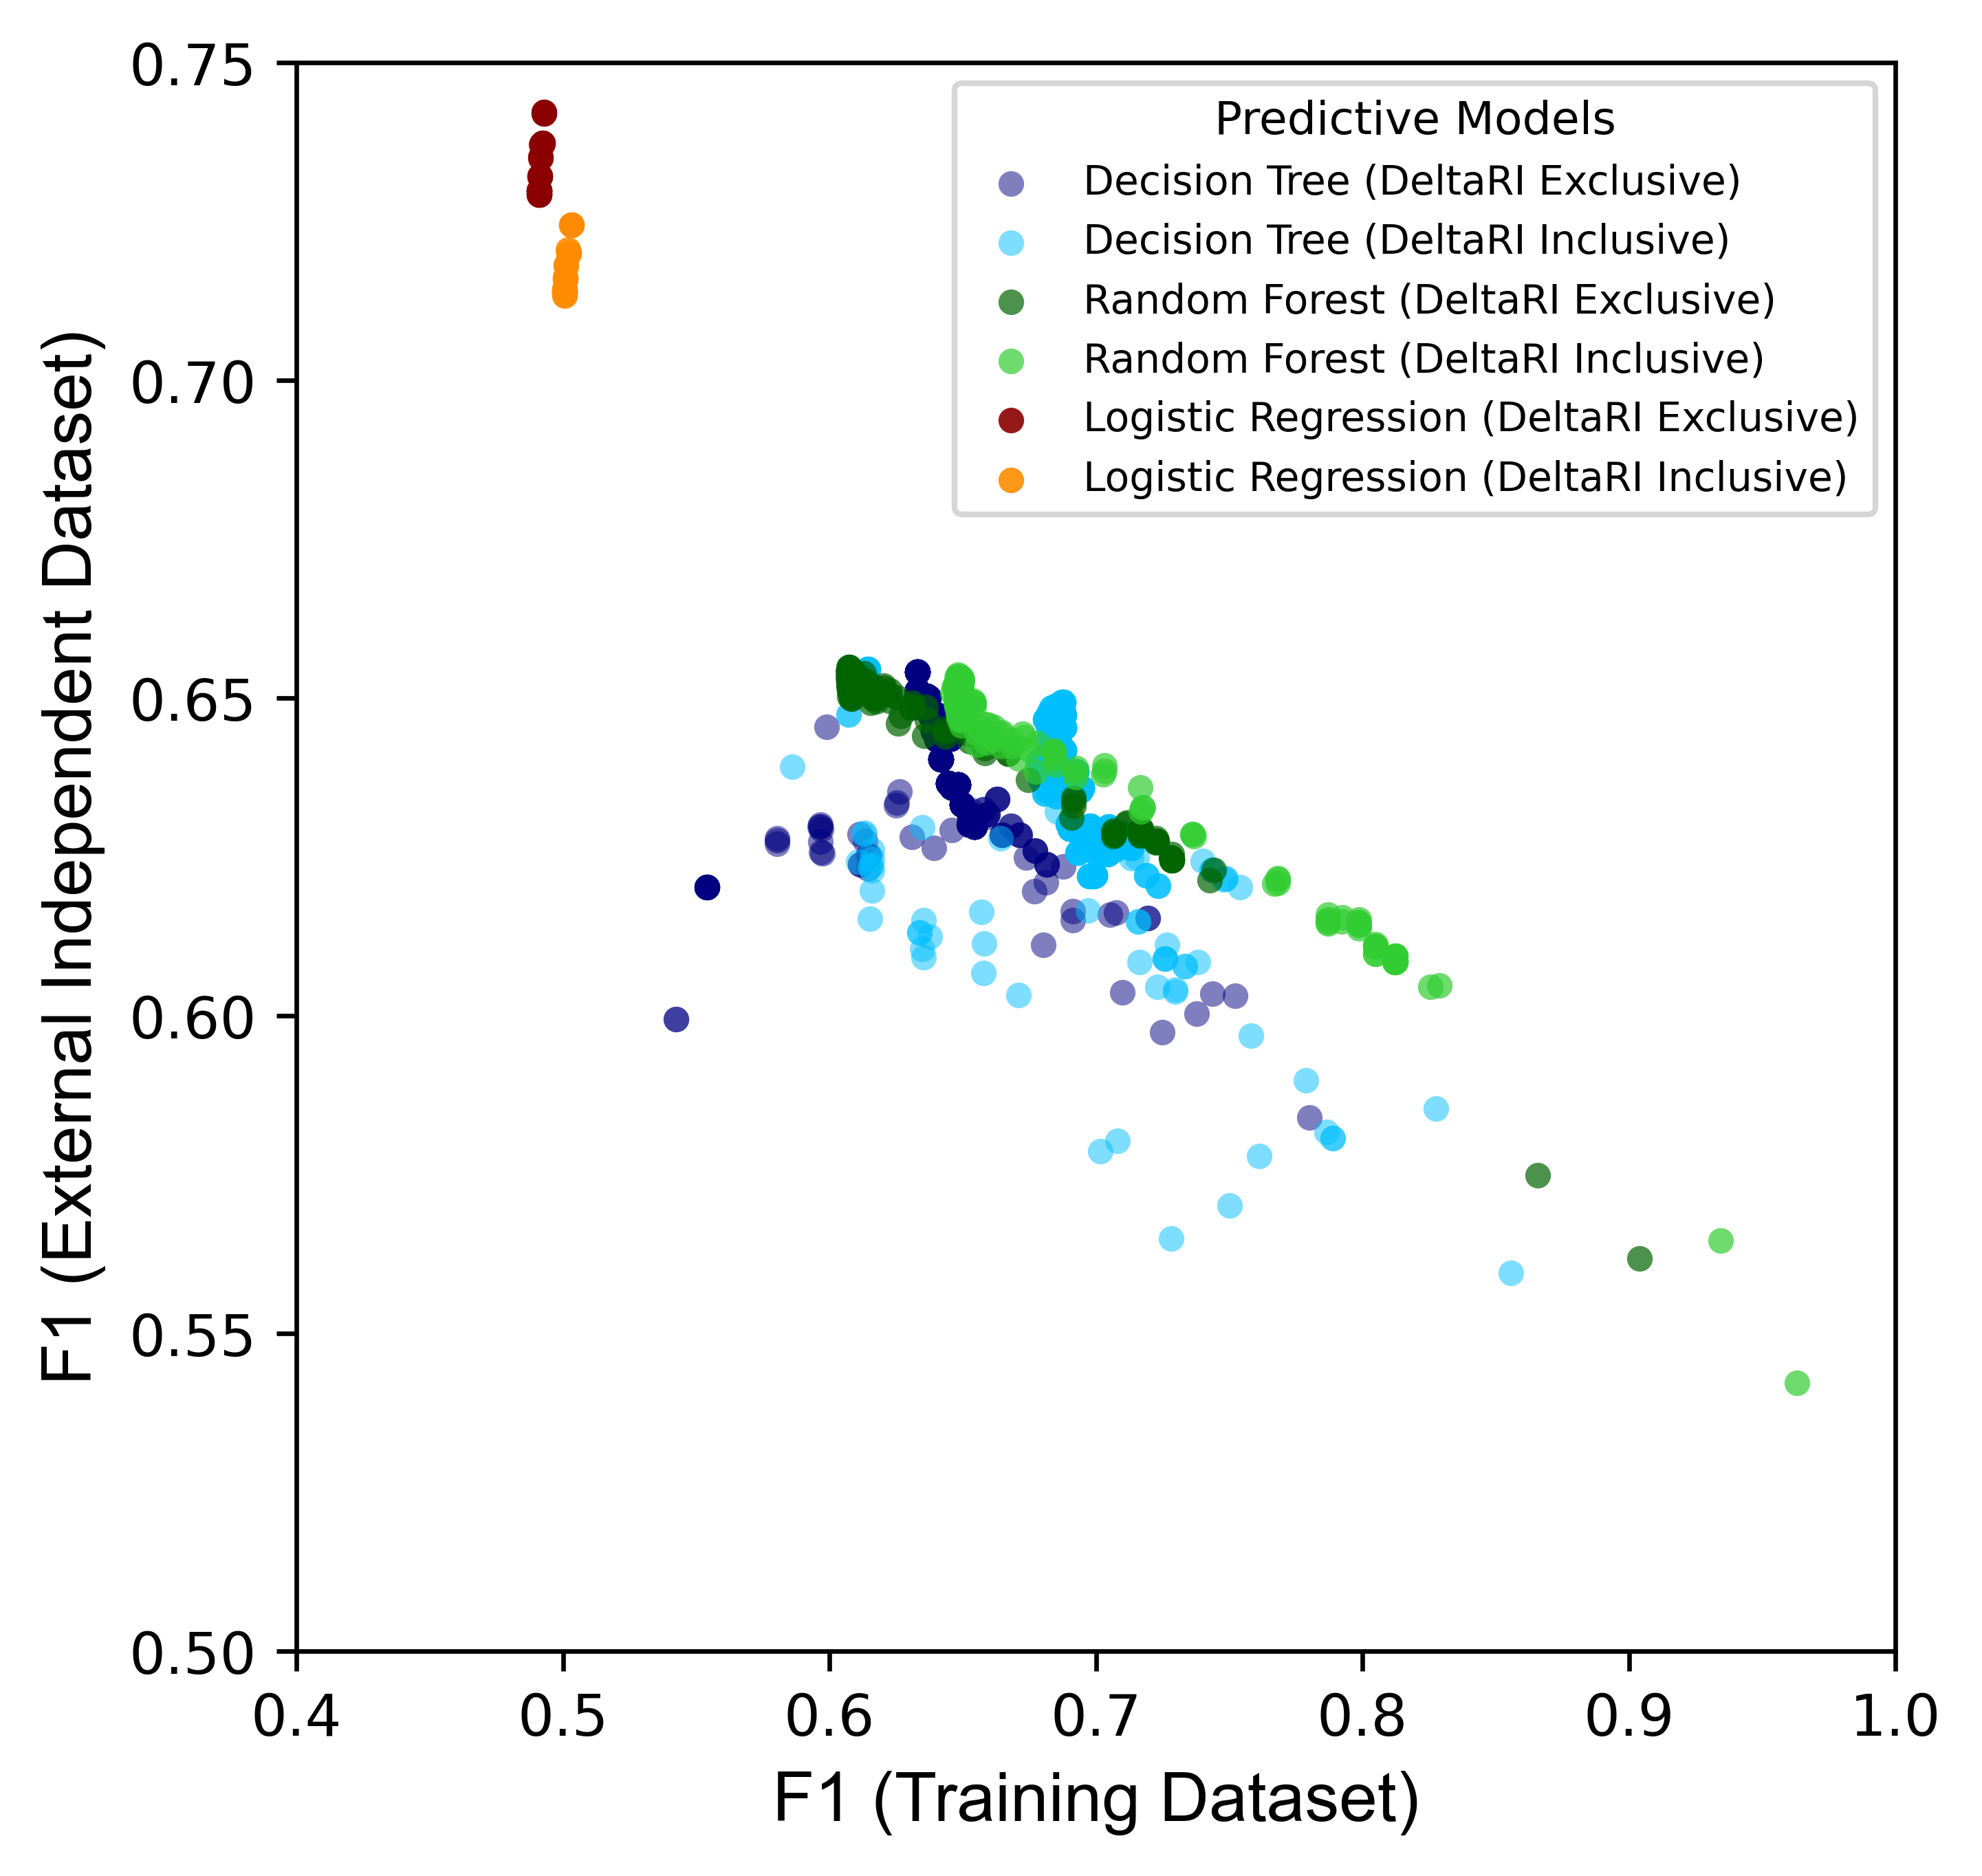

In [133]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

x1 = df_tuneLR['f1_train']
y1 = df_tuneLR['f1_pest2']
z1 = df_tuneLR['f1_pest']
x2 = df_tuneDT['f1_train']
y2 = df_tuneDT['f1_pest2']
z2 = df_tuneDT['f1_pest']
x3 = df_tuneRF['f1_train']
y3 = df_tuneRF['f1_pest2']
z3 = df_tuneRF['f1_pest']

(fig, ax) = plt.subplots()

c_dict2 = {"Decision Tree (DeltaRI Exclusive)": 'navy', "Decision Tree (DeltaRI Inclusive)": 'deepskyblue'}
count_start = 1121
count_end = 2242
for mod in c_dict2:
    ax.scatter(x2[count_start:count_end], z2[count_start:count_end], s=20, label=mod, c=c_dict2[mod], alpha=0.5, lw=0)
    count_start -= 1121
    count_end -= 1121


c_dict3 = {"Random Forest (DeltaRI Exclusive)": 'darkgreen', "Random Forest (DeltaRI Inclusive)": 'limegreen'}
count_start = 192
count_end = 384
for mod in c_dict3:
    ax.scatter(x3[count_start:count_end], z3[count_start:count_end], s=20, label=mod, c=c_dict3[mod], alpha=0.7, lw=0)
    count_start -= 192
    count_end -= 192

c_dict1 = {"Logistic Regression (DeltaRI Exclusive)": 'darkred', "Logistic Regression (DeltaRI Inclusive)": 'darkorange'}
count_start = 32
count_end = 64
for mod in c_dict1:
    ax.scatter(x1[count_start:count_end], z1[count_start:count_end], s=20, label=mod, c=c_dict1[mod], alpha=0.9, lw=0)
    count_start -= 32
    count_end -= 32
    
    
plt.xlabel("F1 (Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("F1 (External Independent Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.4,1.0)
plt.ylim(0.5,0.75)

ax.legend(loc="upper right", title="Predictive Models", title_fontsize=8, fontsize=7)

#plt.show()
plt.savefig(r"D:\Published\exposomeProjUvA\plot\outdated_pest_.jpg", bbox_inches='tight')
#plt.close()